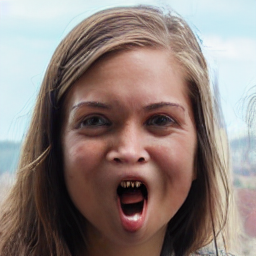

In [3]:
import torch
from PIL import Image
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
# load sample image
raw_image = Image.open("/storage1/ruby/instruct-pix2pix/ffhqtest/fake/69706_1.png").convert("RGB")
display(raw_image.resize((256, 256)))

In [4]:
from lavis.models import load_model_and_preprocess
# loads InstructBLIP model
model, vis_processors, _ = load_model_and_preprocess(name="blip2_vicuna_instruct", model_type="vicuna7b", is_eval=False, device=device)
# prepare the image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

/home/viplab/miniconda3/envs/lavis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/viplab/miniconda3/envs/lavis/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(
Loading checkpoint shards: 100%|██████████| 2/2 [01:19<00:00, 39.94s/it]


In [5]:
model.generate({"image": image, "prompt": "Is this picture deepfake?"})

['yes']

In [15]:
model.generate({
    "image": image,
    "prompt": "Is this photo real( answer Yes or No), If not, why?(hint:fake,edition: widen his mouth let him looks shocked)"})

['yes']